# Assignment

Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled [dataset of sentiment labelled sentences](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) for us to use. This dataset was created for the paper [From Group to Individual Labels using Deep Features](http://mdenil.com/media/papers/2015-deep-multi-instance-learning.pdf), Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

### Import Statements

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

### The Amazon Dataframe

In [108]:
amazon_df = pd.read_excel('Amazon Dataframe.xlsx', delimiter='\t', header=None)
amazon_df.columns = ['Feedback', 'Sentiment']

# Make all the feedback lowercase.
amazon_df['Feedback'] = amazon_df['Feedback'].str.lower()

# Strip out punctuation and numbers.
amazon_df['Feedback'] = amazon_df['Feedback'].str.replace('[^\w\s]','')

# Add spaces before and after each entry in 'Feedback'.
amazon_df['Feedback'] = ' ' + amazon_df['Feedback'] + ' '

amazon_df.head()

,Feedback,Sentiment
0,so there is no way for me to plug it in here ...,0
1,good case excellent value,1
2,great for the jawbone,1
3,tied to charger for conversations lasting mor...,0
4,the mic is great,1


In [109]:
pd.Series(' '.join(amazon_df['Feedback']).lower().split()).value_counts()[:50]

the        513
i          316
and        310
it         281
is         243
a          218
this       206
to         196
phone      162
my         143
for        121
of         119
not        117
with       112
very       103
great       97
was         90
on          89
in          88
that        80
good        75
have        73
you         68
product     55
quality     49
had         48
works       47
headset     47
but         46
battery     45
as          45
its         43
are         42
so          42
use         41
all         41
sound       41
one         40
well        38
ear         35
has         34
work        34
would       34
from        33
your        32
dont        31
like        30
if          29
case        29
than        28
dtype: int64

_Feature Engineering on the Amazon Dataframe_

For the feature engineering, I looked at the list of 50 most common keywords in the 'Feedback' column and used them for my keywords. 

Note: in the future, it'd be useful to filter the 'Sentiment' column so that only positive reviews were included. And it would've been useful to filter the list of top 50 words to exclude common words, like "if", "has" and so on. 

But because of time constraints, I didn't do that here.

In [110]:
# Only want positive keywords and look at the dataframe for commonly used keywords.
amazon_keywords = ['good', 'excellent', 'great', 'love']

# This for loop's setting new values in columns.
for key in amazon_keywords:
    amazon_df[str(key)] = amazon_df.Feedback.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

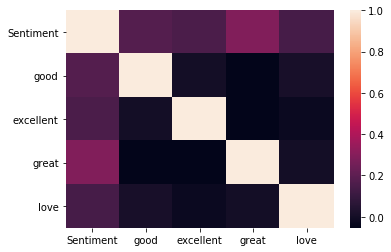

In [111]:
sns.heatmap(amazon_df.corr())

_Building the Training Data on the Amazon Dataframe_

In [112]:
amazon_data = amazon_df[amazon_keywords]
amazon_target = amazon_df['Sentiment']

_Running the Model on the Amazon Dataframe_

In [116]:
mnb = MultinomialNB()

mnb.fit(amazon_data, amazon_target)

y_pred = mnb.predict(amazon_data)

print('Number of mislabeled points in the Amazon dataframe out of a total {} points : {}'.format(
    amazon_data.shape[0],
    (amazon_target != y_pred).sum()
))

Number of mislabeled points in the Amazon dataframe out of a total 1000 points : 376


I tested the Naive Bayes Classifiers and found that Multinomial and Complement Bayes Classifiers were the best algorithm for classification because they found 376 mislabeled points vs. the 332 mislabeled points the Gaussoam and Bernoulli Naive Bayes Classifiers found.

### The Yelp Dataframe

In [3]:
yelp_df = pd.read_excel('Yelp Dataframe.xlsx', delimiter='\t', header=None)
yelp_df.columns = ['Feedback', 'Sentiment']

# Make all the feedback lowercase.
yelp_df['Feedback'] = yelp_df['Feedback'].str.lower()

# Strip out punctuation and numbers.
yelp_df['Feedback'] = yelp_df['Feedback'].str.replace('[^\w\s]','')

# Add spaces before and after each entry in 'Feedback'.
yelp_df['Feedback'] = ' ' + yelp_df['Feedback'] + ' '

yelp_df = yelp_df.dropna()

yelp_df.head()

,Feedback,Sentiment
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday o...,1
4,the selection on the menu was great and so we...,1


_Feature Engineering on the Yelp Dataframe_

For comparison purposes, I'm going to use the same keywords here that I used for the Amazon dataframe.

In [4]:
yelp_keywords = ['good', 'excellent', 'great', 'love']

for key in yelp_keywords:
    yelp_df[str(key)] = yelp_df.Feedback.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

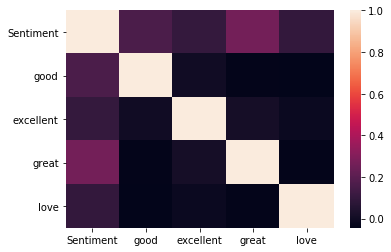

In [5]:
sns.heatmap(yelp_df.corr())

_Building the Training Data on the Yelp Dataframe_

In [6]:
yelp_data = yelp_df[yelp_keywords]
yelp_target = yelp_df['Sentiment']

_Running the Model on the Yelp Dataframe_

In [8]:
gnb = MultinomialNB()

gnb.fit(yelp_data, yelp_target)

y_pred = gnb.predict(yelp_data)

print("Number of mislabeled points out of a total {} points : {}".format(
    yelp_data.shape[0],
    (yelp_target != y_pred).sum()
))

Number of mislabeled points out of a total 996 points : 425


The classifier worked better with the Yelp data than it did with the Amazon data.